# Logistic Regression

## Basic Comparision
* Linear regression
    * Output : numeric value given inputs
* Logistic regression
    * Output : probability [0, 1] given input belonging to a class
    
## Input/Output Comparision
* Linear regression : Mulitiplication
    * input : [1]
        * output : 2
    * input : [2]
        * output : 4
    * Trying to model the relationship y = 2x
* Logistic regression : Spam
    * Input: "Sign up toiget 1 million dollars by tonight"
        * output: p = 0.8
    *Input : "This is z receipt for your recent purchase with Amazon"
        * output: p = 0.3
    * p : probability of spam

## 1.1 Problems of Linear Regression
* EXAMPLE
    * Fever
    * Input: temperature
    * Output: fever or no fever
* Remember
    * Linear Regression: minimize error between points and line

#### Problem 1. 
Fever value can go negative(below 0) and positive(above 1)

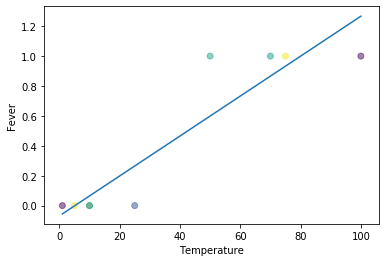

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y =[0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)

plt.show()

#### Problem 2.
Fever points not predicted with outliers

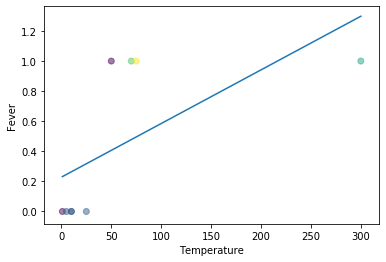

In [2]:
x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y =[0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)

plt.show()

## 2 Logistic Regression 이란
### Predicting Probability
* Linear regression does not work
* Instead of predicting direct values: predict probability

<img src="https://user-images.githubusercontent.com/60699771/85735864-faae4d00-b738-11ea-85a7-08460795c804.png" align=left>
<img src="https://user-images.githubusercontent.com/60699771/85735873-fc781080-b738-11ea-9cf6-cf3028b61bcc.png" align=left>
<img src="https://user-images.githubusercontent.com/60699771/85735879-fda93d80-b738-11ea-8f1c-baef40ac9796.png" align=left>

#### Cross entropy 이해하기

In [3]:
import math
print(-math.log(1 - 0.00001)) # L = 0, S = 0 일때로 정확한 예측한 것
print(-math.log(1 - 0.99999))
print(math.log(1 - 0.00001)) # L = 1, S = 1 일때로 정확한 예측한 것
print(math.log(1 - 0.99999))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.51292546497478


<img src="https://user-images.githubusercontent.com/60699771/85768100-a19fe280-b753-11ea-9d32-943717ec462f.png" align=left>

## 3. Logistic Regression Model 구축

<img src="https://user-images.githubusercontent.com/60699771/85768951-82ee1b80-b754-11ea-89a8-63af13522585.png" align=left>

### Steps
* Step 1 : Load Dataset
* Step 2 : Make Dataset Iterable
* Step 3 : Create Model Class
* Step 4 : Instantiate Model Class
* Step 5 : Instantiate Loss Class
* Step 6 : Instantiate Optimizer Class
* Step 7 : Train Model

### Step 1.1  Loading MNIST Train Dataset

In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [5]:
train_dataset = dsets.MNIST(root='./data',
                           train= True,
                           transform= transforms.ToTensor(),
                           download=True)

In [6]:
len(train_dataset)

60000

In [7]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
type(train_dataset[0])

tuple

In [9]:
type(train_dataset[0][0])

torch.Tensor

In [10]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [11]:
# Label
train_dataset[0][1]

5

#### Displaying MNIST

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [14]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

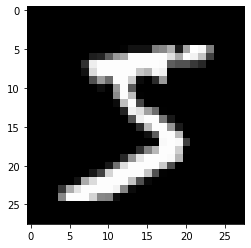

In [15]:
plt.imshow(show_img, cmap="gray")

0


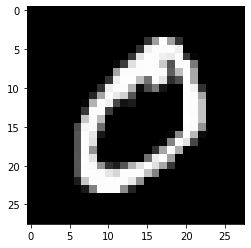

In [16]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap="gray")
print(train_dataset[1][1])

### Step 1.2  Loading MNIST Test Dataset

In [17]:
test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform = transforms.ToTensor())

In [18]:
len(test_dataset)

10000

In [19]:
type(test_dataset[0])

tuple

In [20]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

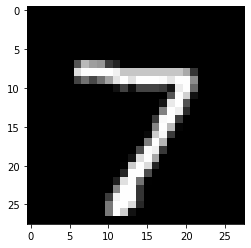

In [21]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [22]:
# label
test_dataset[0][1]

7

### Step 2. Make Dataset Iterable
* Aim: Make the datset iterable
* total data: 60000
* minibatch: 100
    * Number of examples in 1 iteration
* tierations: 3000
    * 1 iteration: one mini-batch forward & backward pass
* epochs
    * 1 epoch: running through the whole dataset once
    * epoch : iterations / totaldata * minibatch = 3000 / 60000 * 100 = 5

In [23]:
len(train_dataset)

60000

In [24]:
batch_size = 100

In [25]:
n_iters= 3000

In [26]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

#### Create Iterable Object: Training Dataset

In [27]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

#### Check Iterability

In [28]:
import collections
isinstance(train_loader, collections.Iterable)

C:\Users\seohwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


True

#### Create Iterable Object: Testing Dataset

In [29]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

#### Check Iterability

In [30]:
import collections
isinstance(test_loader, collections.Iterable)

True

#### Main Aim: Iterate Through Dataset

In [31]:
img1 = np.ones((28, 28))
img2 = np.ones((28, 28))
lst = [img1, img2]

In [32]:
# Need to iterate
# Think of numbers as the images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


### Step 3. Building a Model

In [33]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

### Step 4. Instantiate Model Class
* Input dimension: 784
    * size of image : 2 x 28 =784
* Output dimension: 10
    * 0,1,2,3,4,5,6,7,8,9

In [34]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

### Step 5. Instantiate Loss Class
* Logsitic Regression : Cross Entropy Loss
    * cf : Linear Regression: MSE
    
* What happens in nn.CrossEntropyLoss()?
    * Computes softmax (logistic/softmax function)
    * Computes corss entropy<br>
<img src="https://user-images.githubusercontent.com/60699771/85735864-faae4d00-b738-11ea-85a7-08460795c804.png" align=left>

In [35]:
criterion = nn.CrossEntropyLoss()

### Step4. instantiate Optimizer Class
<img src="https://user-images.githubusercontent.com/60699771/85815174-b8215a80-b7a2-11ea-917f-de5c35eb9ea9.png" align=left>

In [36]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Parameters In-Depth

In [37]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size()) # y = ax + b 의 a를 나타낸다(10개의 label과 28x28 pixel)

# FC 2 Bias Parameters
print(list(model.parameters())[1].size()) # y = ax + b 의 b를 나타낸다(10개의 label)

<generator object Module.parameters at 0x000002A896E761C8>
2
torch.Size([10, 784])
torch.Size([10])


<img src="https://user-images.githubusercontent.com/60699771/85815951-df792700-b7a4-11ea-9a13-5777429ad902.png" align=left>

<img src="https://user-images.githubusercontent.com/60699771/85818788-8614f600-b7ac-11ea-82bf-724eafd660f2.png" align=left>

### Step7: Train a Model
* process
    1. Convert inputs/labels to variables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t parameters
    6. Update parameters using gradients
        * parameters = parameters - lr * parameters_gradients
    7. Repeat

In [38]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load Images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model.forward(images)
        
        # Calculate Loss: softmax -> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting Gradients w.r.t parameters
        loss.backward()
        
        #Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
#                 print(total)
#                 print(predicted)
#                 print(labels)
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct /total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Iteration: 500. Loss: 1.8184772729873657. Accuracy: 69
Iteration: 1000. Loss: 1.5051782131195068. Accuracy: 76
Iteration: 1500. Loss: 1.3049179315567017. Accuracy: 79
Iteration: 2000. Loss: 1.1729992628097534. Accuracy: 81
Iteration: 2500. Loss: 1.0673575401306152. Accuracy: 81
Iteration: 3000. Loss: 1.012159824371338. Accuracy: 82


#### Break Down Accuracy Calculation

In [39]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model.forward(images)
    if iter_test == 1:
        print("Outputs")
        print(outputs)
        print(outputs.size()) #mini_barch가 100이기에 100,10으로 나온다. 100개의 이미지가 10개의 label을 예측
    _, predicted = torch.max(outputs.data, 1)

Outputs
tensor([[-1.7988e+00, -1.1102e-01, -1.1295e+00,  2.8129e-01,  3.3204e-01,
         -5.5493e-02, -7.8170e-01,  2.4027e+00,  3.1097e-02,  1.0742e+00],
        [-7.5272e-01, -1.7931e+00, -6.5636e-01, -1.1657e-02,  1.8484e-01,
         -3.9509e-01, -1.2633e+00,  3.6706e+00, -3.2288e-01,  1.1789e+00],
        [ 9.9005e-01, -1.2661e+00,  1.0409e+00, -2.1761e+00, -4.7016e-02,
         -5.7940e-01,  3.6514e+00, -1.6184e+00,  2.9453e-01, -1.1624e-01],
        [ 7.5409e-01, -3.1524e+00,  1.1327e+00, -1.0300e+00,  7.3251e-01,
          8.0036e-03,  2.9110e+00, -1.1526e+00, -7.6327e-01, -3.8438e-01],
        [-5.7435e-01, -1.5137e+00, -5.8235e-01,  6.5765e-01,  3.3675e-01,
         -6.3509e-02, -1.0203e+00,  1.6730e+00, -3.2704e-01,  1.2470e+00],
        [ 4.6114e-01, -5.3788e-01, -4.3199e-02,  2.2022e+00, -1.4012e+00,
          8.0426e-01, -1.1935e-01, -6.8572e-01,  1.8273e-01, -1.2145e+00],
        [-1.3312e+00,  2.4153e+00, -1.3500e-01,  3.1984e-01, -9.5408e-01,
         -2.8131e-01, -8

In [40]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model.forward(images)
    if iter_test == 1:
        print("Outputs")
        print(outputs[0, :]) # 7이 가장 높으므로 7이라고 예측한다.
    _, predicted = torch.max(outputs.data, 1)

Outputs
tensor([ 2.9971, -1.6100, -0.2586, -1.2217, -0.7300,  0.4560,  0.2920,  0.7110,
        -0.2625, -0.0081], grad_fn=<SliceBackward>)


In [42]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model.forward(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print("PREDICTION")
#         print(predicted[0,:])
        
        print("Label Size")
        print(predicted.size())
        
        print('Label for image 0')
        print(labels[0])

PREDICTION
Label Size
torch.Size([100])
Label for image 0
tensor(2)


In [43]:
import numpy as np
a = np.ones((10))
print(a)
b = np.ones((10))
print(b)

print(a == b)
print((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


## 4. Saving Model

In [44]:
save_model = True
if save_model == True:
    # Saves only parameters
    torch.save(model.state_dict(), 'logsitic_regression_model.pkl')